In [1]:
from __future__ import print_function, division, absolute_import

# Solutions for image visualization

Some exercises make use of code in the notebook. Other exercises will require a GUI interaction. In those cases, one or more images of results are included.

# 1. matplotlib: Contours from another image, and secondary axes

Using matplotlib and astropy:

* display the file `.data/w5.fits` as a bitmap with log stretch and min-max scaling
* overlay the data in image extension 1 of `./data/0259p6031_1342192088_SpirePhoto_L20_PMP350_SPG14.0.fits.fits.gz` as white contours with levels drawn at [0.7, 1.4, 3] image units (Jy/beam)
* display coordinate axes and grid (green, alpha=1) in (RA, Dec)  
* overlay a coordinate grid (cyan, alpha=1) and axis labels in Galactic longitude and latitude

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import (MinMaxInterval,
                                  LogStretch,
                                  ImageNormalize)
%matplotlib inline

In [3]:
hdu = fits.open('./data/w5.fits')[0]
wcs = WCS(hdu.header)

hdu2 = fits.open('./data/0259p6031_1342192088_SpirePhoto_L20_PMP350_SPG14.0.fits.gz')[1]

norm = ImageNormalize(hdu.data, interval=MinMaxInterval(),
                      stretch=LogStretch())

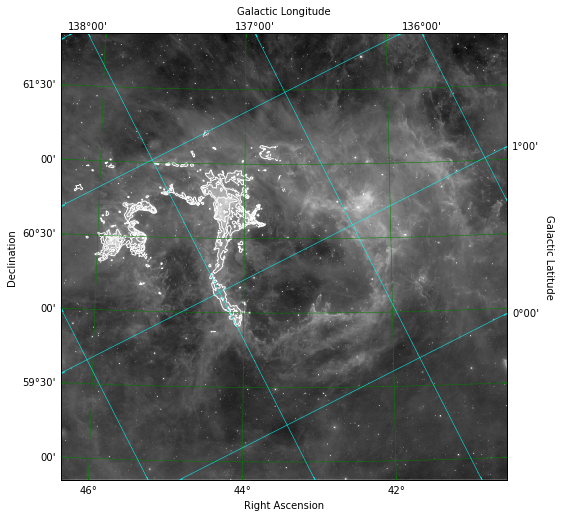

In [4]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=wcs)

overlay = ax.get_coords_overlay('galactic')

plt.imshow(hdu.data, norm=norm, origin="lower", cmap='Greys_r')

ax.coords['ra'].set_ticks(color='green')
ax.coords['dec'].set_ticks(color='green')

ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ax.coords.grid(color='green', linestyle='solid', alpha=1.0)

overlay['l'].set_ticks(color='cyan')
overlay['b'].set_ticks(color='cyan')

overlay['l'].set_axislabel('Galactic Longitude')
overlay['b'].set_axislabel('Galactic Latitude')

overlay.grid(color='cyan', linestyle='solid', alpha=1.0)


ax.contour(hdu2.data, transform=ax.get_transform(WCS(hdu2.header)),
           levels=[0.7,1.4,3], colors='white');

# 2. RGB-3-color images

Using astropy and reproject (installable with `pip install reproject`), follow [these instructions](http://docs.astropy.org/en/stable/visualization/lupton_rgb.html) in the Astropy documentation to make color RGB images. Compare the second one to Figure 1 of [Lupton et al 2004](https://arxiv.org/abs/astro-ph/0312483).

In [5]:
import numpy as np
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from reproject import reproject_interp

In [6]:
# Read in the three images downloaded from here:
g = fits.open('http://dr13.sdss.org/sas/dr13/eboss/photoObj/frames/301/1737/5/frame-g-001737-5-0039.fits.bz2')[0]
r = fits.open('http://dr13.sdss.org/sas/dr13/eboss/photoObj/frames/301/1737/5/frame-r-001737-5-0039.fits.bz2')[0]
i = fits.open('http://dr13.sdss.org/sas/dr13/eboss/photoObj/frames/301/1737/5/frame-i-001737-5-0039.fits.bz2')[0]

In [7]:
# remap r and i onto g
r_new, r_mask = reproject_interp(r, g.header)
i_new, i_mask = reproject_interp(i, g.header)

# zero out the unmapped values
i_new[np.logical_not(i_mask)] = 0
r_new[np.logical_not(r_mask)] = 0

# red=i, green=r, blue=g
# make a file with the default scaling
rgb_default = make_lupton_rgb(i_new, r_new, g.data, filename="ngc6976-default.jpeg")
# this scaling is very similar to the one used in Lupton et al. (2004)
rgb = make_lupton_rgb(i_new, r_new, g.data, Q=10, stretch=0.5, filename="ngc6976.jpeg")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


![Default scaling](ngc6976-default.jpeg)

![Scaling to show faint features of the galaxies](ngc6976.jpeg)

# 3. RGB colors of Herschel-SPIRE images

Reproject the 250 um image of W5 in `./data/0259p6031_1342192088_SpirePhoto_L20_PMP250_SPG14.0.fits.gz` (extension 1) and the 350 micron image in `./data/0259p6031_1342192088_SpirePhoto_L20_PMP350_SPG14.0.fits.gz` onto the 500 micron image in that directory, and try the same 3-color procedures.

In [8]:
w5_250 = fits.open('./data/0259p6031_1342192088_SpirePhoto_L20_PMP250_SPG14.0.fits.gz')[1]
w5_350 = fits.open('./data/0259p6031_1342192088_SpirePhoto_L20_PMP350_SPG14.0.fits.gz')[1]
w5_500 = fits.open('./data/0259p6031_1342192088_SpirePhoto_L20_PMP500_SPG14.0.fits.gz')[1]

In [9]:
im250, msk250 = reproject_interp(w5_250, w5_500.header)
im350, msk350 = reproject_interp(w5_350, w5_500.header)

In [10]:
# zero out the unmapped values
im250[np.logical_not(msk250)] = 0
im350[np.logical_not(msk350)] = 0



In [11]:
rgb_w5_default = make_lupton_rgb(im250, im350, w5_500.data, filename="w5-default.jpeg")

/Users/shupe/anaconda/lib/python3.5/site-packages/astropy/visualization/lupton_rgb.py:158: RuntimeWarning: invalid value encountered in less
  c[c < 0] = 0                # individual bands can still be < 0, even if fac isn't


![Default scaling](w5-default.jpeg)

In [12]:
rgb_w5 = make_lupton_rgb(im250, im350, w5_500.data, Q=10, stretch=0.5, filename="w5.jpeg")

/Users/shupe/anaconda/lib/python3.5/site-packages/astropy/visualization/lupton_rgb.py:158: RuntimeWarning: invalid value encountered in less
  c[c < 0] = 0                # individual bands can still be < 0, even if fac isn't


![Default scaling](w5.jpeg)

# 4. Ginga reference viewer

If you haven't already, install Ginga with `pip install ginga`.

* Launch the Ginga reference viewer from the shell.
* Read in the three Herschel-SPIRE images in ./data/0259\*fits.gz into separate channels
   * Use top-level menu "Channel -> Add Channel"
   * Use top-level menu "File -> Load Image"
* Start the WCS Match plugin and blink the images

![Ginga with three channels](ginga_wcsmatch.png)

# 5. Firefly with PTF Images

* Point your browser to IRSA's [PTF image service](http://irsa.ipac.caltech.edu/applications/ptf/). 
* Search position `312.503802, -0.706603` in the Level 1 images.
* Go to Catalogs, overlay Gaia catalog
* Select different images; and select different Gaia sources in an image (two tabs in table).

![Firefly PTF images with Gaia overlaid](firefly_ptf.png)

# 6. Glue with a photometric redshift catalog

If you haven't already, install Glue with `conda install -c conda-forge glueviz`

* Start glue from the command line
* Import a photometric redshift catalog from `./data/mrrphotz_xmmbrite.dat`
* Import the image `./data/xmm-lss-cutout-350um`
* Link the `ra` and `dec` from the table to `Right Ascenscion` and `Declination` from the image
* Drag the image and start an Image Viewer
* Drag the catalog over the image

* Table `alz2` is $log_{10}(1+z_{phot})$ for free $A_V$ solution. Define a new component `photz` inside Glue as `np.power( 10, mrrphotz_xmmbrite.dat:alz2 ) - 1.0` and add it to the table
* Make a histogram of spectroscopic redshift, spectz0. Select the subset of spectz0 > 0 and call it `non-zero specz`
* Make a scatter plot of photz vs spectz0 for this subset

* Facet the `non-zero specz` into 5 subsets by `nbopt` (number of optical bands). Explore the spatial distribution of  the data with the highest number of optical bands.

![After selection and faceting](glue_photz_exploration.png)

# Advanced: Install Firefly Standalone

If you have Java or are comfortable installing it, you can install a local Firefly server.


Check that you have java 1.8 installed with `java -version`

Download Firefly Standalone from release page (https://github.com/Caltech-IPAC/firefly/releases  

Start with `java -jar firefly-exec.war`  

Firefly will be available on localhost port 80: http://localhost:8080/firefly/

Once it is running, if you have done `pip install firefly_client`:  

* upload the file `.data/w5.fits` and display it
* overlay the w5_wise.tbl

The steps are in the ImageVizSlides notebook.